# Using Machine Learning Tools: Workshop 2

**Chapter 1 – The Machine Learning landscape**

This is a modified version of the code accompanying Chapter 1 of 
_Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, 2e_ by Aurelien Geron

--------------------------------------------------------------------

First check we have the required Python libraries.

Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Code example
import numpy as np
import pandas as pd
import sklearn.linear_model
%matplotlib inline  

## Markdowns provided correspond to Questions in the "Workshop 2: Dealing with data" page in my uni. - Question 1. Read in the CSV file into a Pandas DataFrame Links **


In [5]:
# Load the data using a pandas function
housing = pd.read_csv("workshop2.csv")

## Question 2. Use the DataFrame functions such as head(), info(), describe() to get a quick overview of the data. Pay attention to the type, count and range of each feature.

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.648344,28.656928,537.870553,1425.379942,499.539680,3.870623,206855.816909
std,2.003532,3.200177,12.848021,421.385070,1132.583966,382.329753,1.899920,115395.615874
min,-124.350000,32.540000,1.000000,1.000000,-999.000000,1.000000,-0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,378.000000,400.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Question 3. Handling Missing/Invalid Data

In [9]:
housing.drop(columns=['ocean_proximity'],inplace=True)
housing.head()
print(housing.iloc[:,:]) #printing a portion of them directly using the Pandas iloc[] function

       longitude  latitude  housing_median_age total_rooms  total_bedrooms  \
0        -122.23     37.88                  41         880           129.0   
1        -122.22     37.86                  21        7099          1106.0   
2        -122.24     37.85                  52        1467           190.0   
3        -122.25     37.85                  52        1274           235.0   
4        -122.25     37.85                  52        1627           280.0   
...          ...       ...                 ...         ...             ...   
20635    -121.09     39.48                  25        1665           374.0   
20636    -121.21     39.49                  18         697           150.0   
20637    -121.22     39.43                  17        2254           485.0   
20638    -121.32     39.43                  18        1860           409.0   
20639    -121.24     39.37                  16        2785           616.0   

       population  households  median_income  median_house_valu

In [10]:
print(np.sum(housing.isna()))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


/home/sam-chau/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [11]:
# The following is what I use (and I put it in the PythonCookbook)
# Notice the difference between the outputs of this and the previous one
np.sum(np.isnan(housing.apply(pd.to_numeric, errors="coerce")))

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1018
total_bedrooms         207
population               0
households               0
median_income            0
median_house_value       0
dtype: int64

In [12]:
# Convert to numerical, then drop all problem rows (this is only one option for dealing with these)
housing = housing.apply(pd.to_numeric, errors="coerce")
housing.info()
print(np.sum(housing.isna()))
housing.dropna(inplace=True)  # Comment this out if you want to use imputation later on
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         19622 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.4 MB
longitude                0
latitude                 0
housing_median_age       0
total_rooms           1018
total_bedrooms         207
population               0
households               0
median_income            0
median_house_value       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 19

/home/sam-chau/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## Question 4. Visualization with the help of plots
**One observation: if have nan values (i.e if you have commented the "#housing.dropna(inplace=True) in Question 3) and we try to plot, the box plot will be empty for the total_rooms and total_bedrooms, because they have NaN values.
These get handled in the imputation step later. If you uncomment and run it, the missing box plots won't be an issue since the rows with NaNs are removed.**

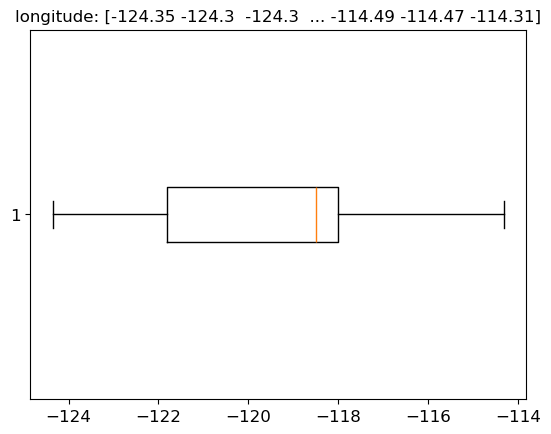

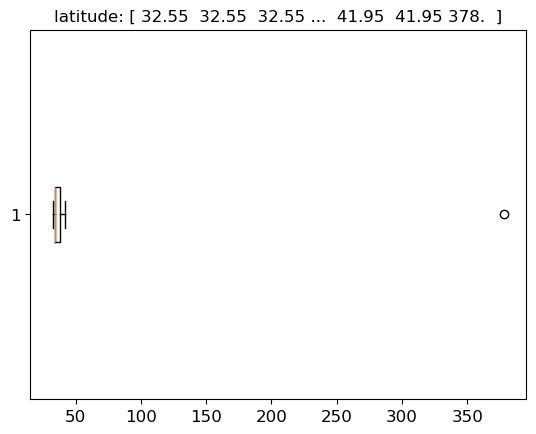

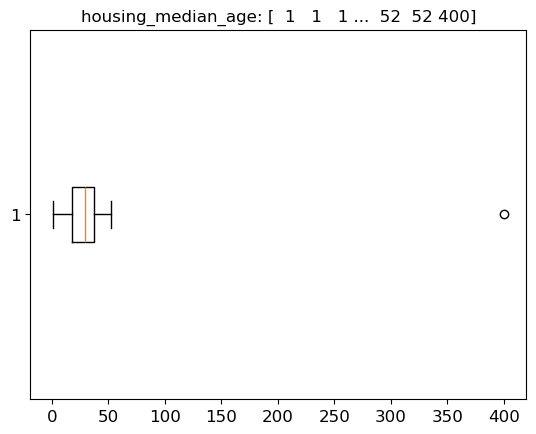

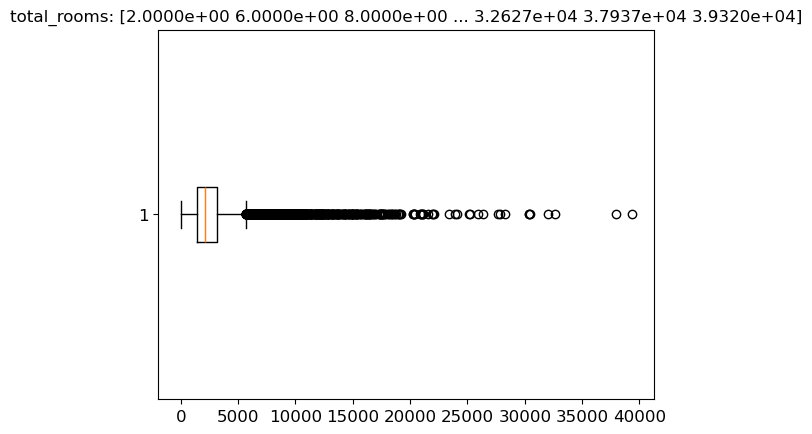

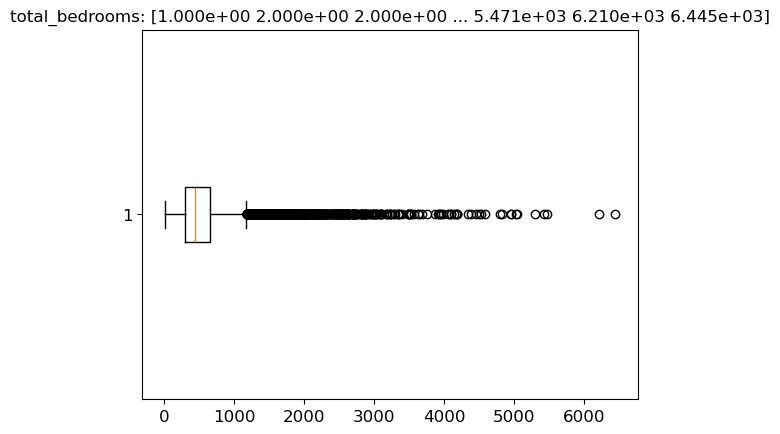

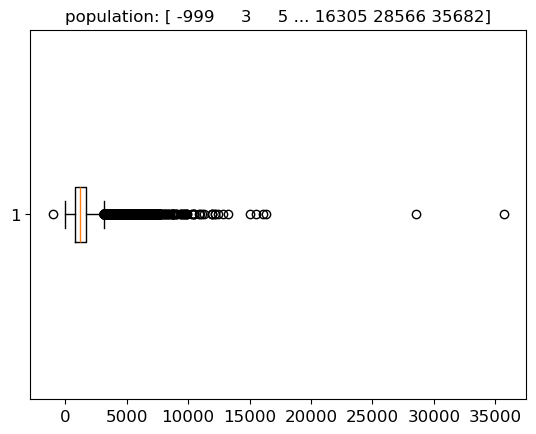

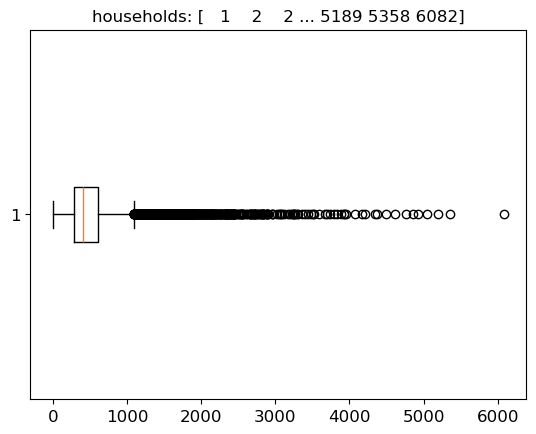

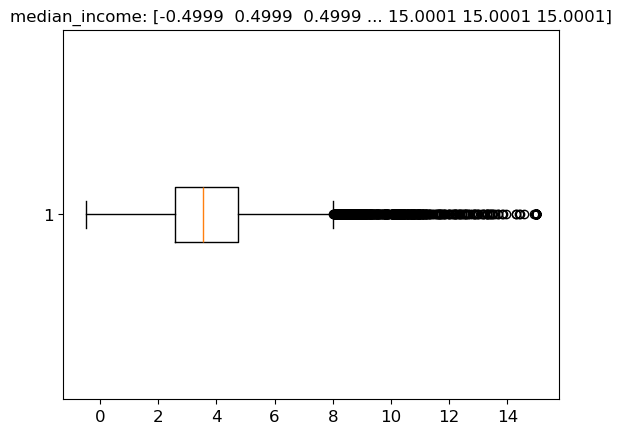

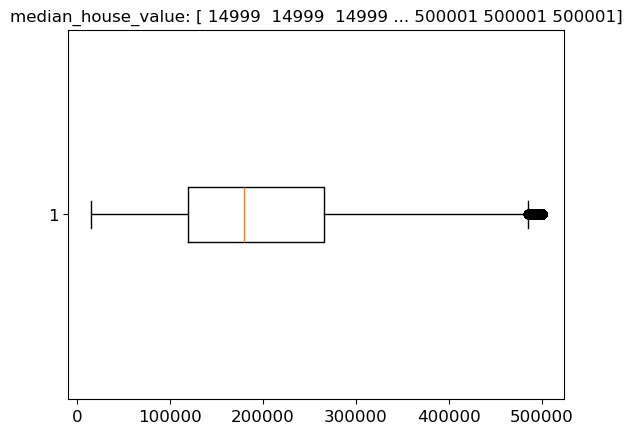

In [13]:
# Visualise using boxplots
for n in range(housing.shape[1]):
    plt.boxplot(housing.iloc[:,n],vert=False)
    plt.title(f'{housing.columns[n]}: {np.sort(housing.iloc[:,n])}')
    plt.show()

longitude: [-124.35 -124.3  -124.3  ... -114.49 -114.47 -114.31]


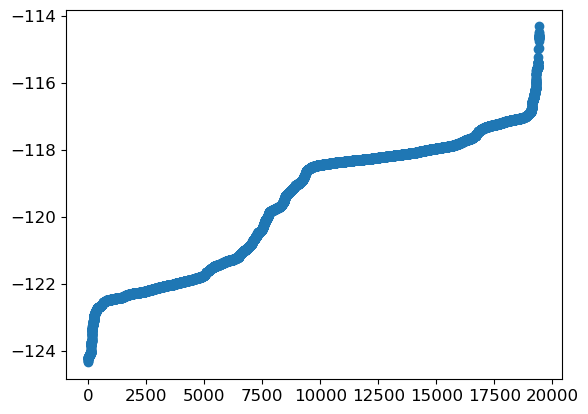

latitude: [ 32.55  32.55  32.55 ...  41.95  41.95 378.  ]


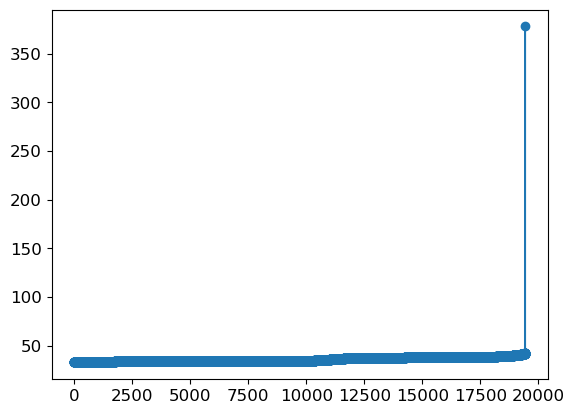

housing_median_age: [  1   1   1 ...  52  52 400]


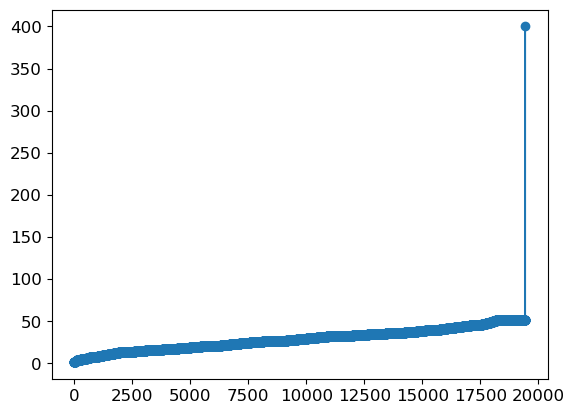

total_rooms: [2.0000e+00 6.0000e+00 8.0000e+00 ... 3.2627e+04 3.7937e+04 3.9320e+04]


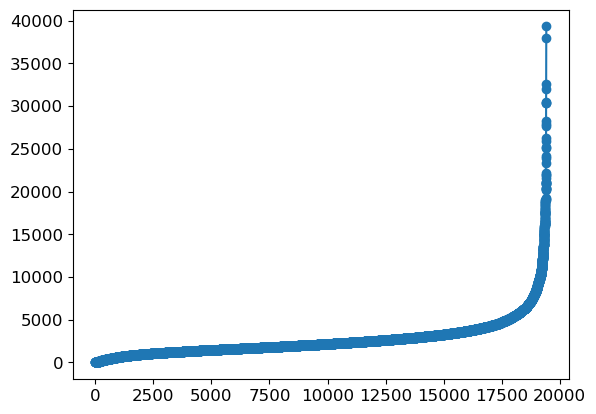

total_bedrooms: [1.000e+00 2.000e+00 2.000e+00 ... 5.471e+03 6.210e+03 6.445e+03]


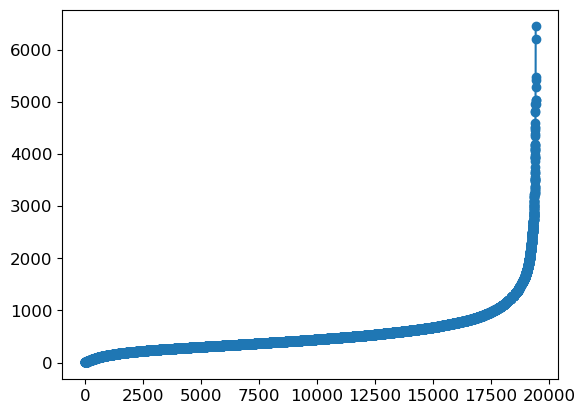

population: [ -999     3     5 ... 16305 28566 35682]


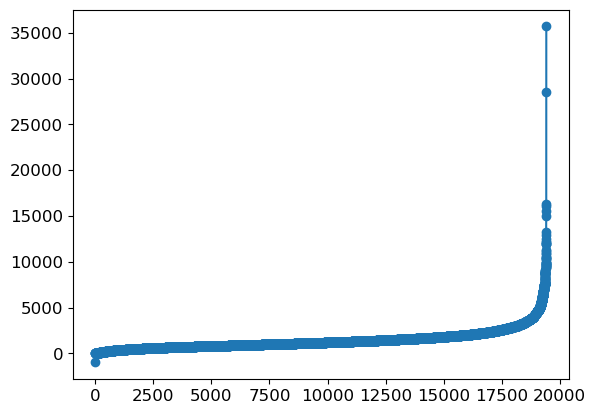

households: [   1    2    2 ... 5189 5358 6082]


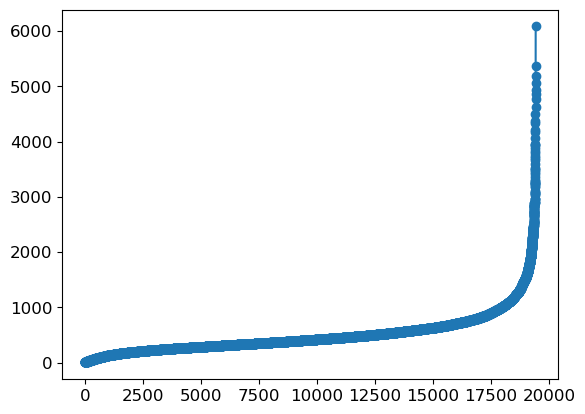

median_income: [-0.4999  0.4999  0.4999 ... 15.0001 15.0001 15.0001]


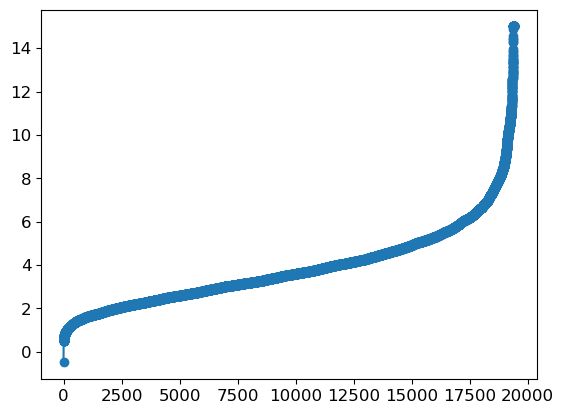

median_house_value: [ 14999  14999  14999 ... 500001 500001 500001]


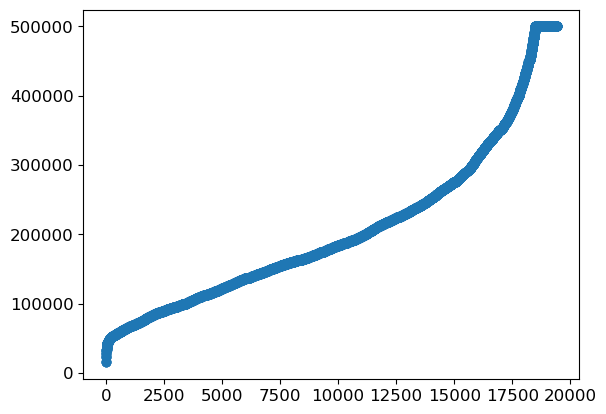

In [14]:
# Visualise using sorted values
for n in range(housing.shape[1]):
    print(f'{housing.columns[n]}: {np.sort(housing.iloc[:,n])}')
    plt.plot(np.sort(housing.iloc[:,n]),'-o')
    plt.show()

In [15]:
# Visualise using histograms
dummy = housing.hist(bins=40,figsize=(15,10))

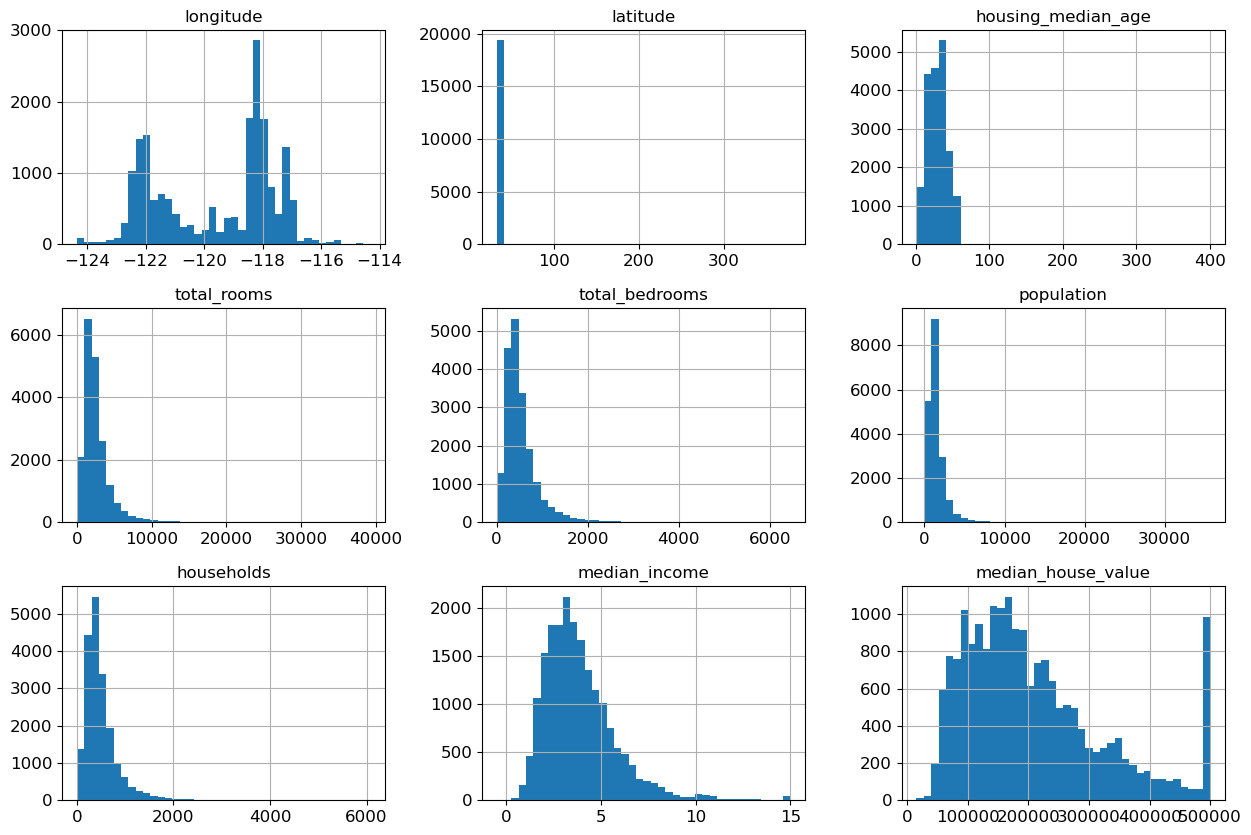

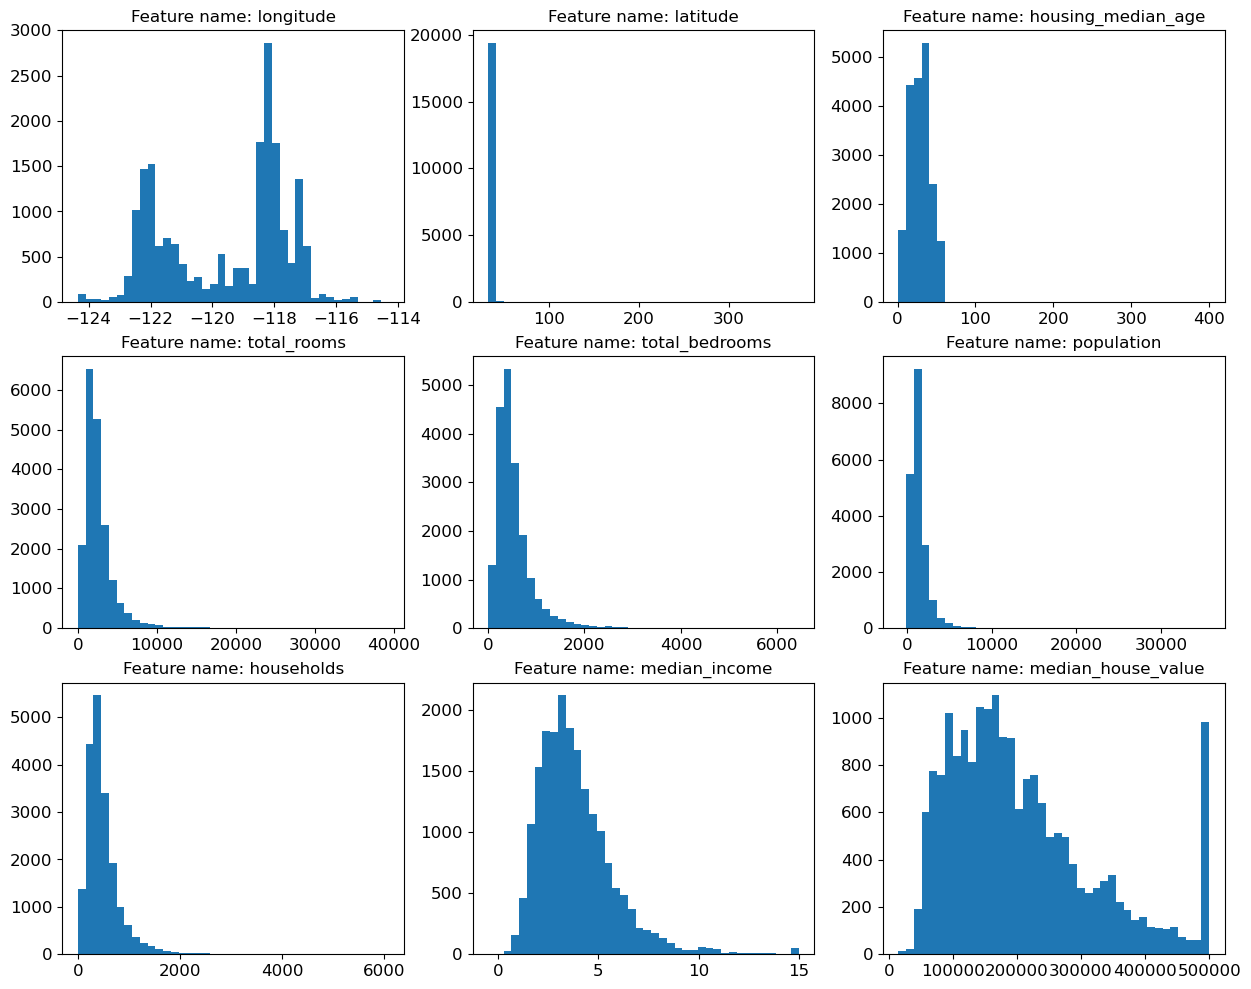

In [16]:
# Alternative using matplotlib
plt.figure(figsize=(15,12))
nfeat = housing.shape[1]
ncol = 3
nrow = int(np.ceil(nfeat/ncol))
for n in range(nfeat):
    plt.subplot(nrow,ncol,n+1)
    plt.hist(housing.iloc[:,n],bins=40)
    plt.title(f'Feature name: {housing.columns[n]}')
plt.show()

Now fix various problems with features, as identified from the above visualisations and descriptive tables

**In this step we are re-checking for any invalid data and converting it to “nan” (although this step is redundant as we have already converted those values to “nan” prior to visualisation, we are adding another layer of scrutinization)**


In [17]:
# Fix features ... chosen by examining the plots and descriptions above
# Unfinished parts in this cell and later are indicated with question marks
# In this step we are re-checking for any invalid data and converting it to “nan” (although this step is redundant as we have already converted those values to “nan” prior to visualisation, we are adding another layer of scrutinization)

bad_vals = housing[housing.iloc[:, 3] == "??"].index  # Finding rows with "??" in total_rooms 
housing.iloc[bad_vals, 3] = np.nan  # Replacing them with NaN
print(bad_vals)  # This will show indices of rows where "??" was found
print(housing.iloc[bad_vals])  # Check the affected rows

housing.describe()


Index([], dtype='int64')
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value]
Index: []


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000
mean,-119.571267,35.649606,28.669875,2641.944147,538.692731,1427.121744,500.221765,3.873114,207133.465922
std,2.002079,3.254161,12.867670,2195.531083,422.926485,1138.043756,383.413195,1.900344,115585.786574
min,-124.350000,32.550000,1.000000,2.000000,1.000000,-999.000000,1.000000,-0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,297.000000,788.000000,281.000000,2.564325,119425.000000
50%,-118.490000,34.260000,29.000000,2126.000000,435.000000,1166.000000,410.000000,3.538500,180100.000000
75%,-118.010000,37.710000,37.000000,3144.000000,647.000000,1726.000000,606.000000,4.744900,265500.000000
max,-114.310000,378.000000,400.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
# Take a copy of the dataframe
# Note that this is not a true *deep* copy, as not all lower level structures are copied
# See copy.deepcopy for a true deep copy (though we don't need this now)
housing_copy = housing.copy()

## Question 7. Imputation Process

In [19]:
# Estimate medians now that data is tidied up (though it would not change much)
medians = np.nanmedian(housing,axis=0) # if axis = 0, it calculates median column wise, if axis = 1, row wise calculation of median, In our case we need cloumn wise calculation.
print(medians)
housing.info()
print(housing.shape)

[-1.1849e+02  3.4260e+01  2.9000e+01  2.1260e+03  4.3500e+02  1.1660e+03
  4.1000e+02  3.5385e+00  1.8010e+05]
<class 'pandas.core.frame.DataFrame'>
Index: 19426 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19426 non-null  float64
 1   latitude            19426 non-null  float64
 2   housing_median_age  19426 non-null  int64  
 3   total_rooms         19426 non-null  float64
 4   total_bedrooms      19426 non-null  float64
 5   population          19426 non-null  int64  
 6   households          19426 non-null  int64  
 7   median_income       19426 non-null  float64
 8   median_house_value  19426 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.5 MB
(19426, 9)


In [20]:
# Perform imputation using median values (it is critical that this is done _after_ tidying data up)
for n in range(housing.shape[1]):
    housing.iloc[:,n] = housing.iloc[:,n].fillna(medians[n])
housing.describe()
housing.info() #notice 20640, this infers all the missing values were filled using median value of the respective column/feature.

<class 'pandas.core.frame.DataFrame'>
Index: 19426 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19426 non-null  float64
 1   latitude            19426 non-null  float64
 2   housing_median_age  19426 non-null  int64  
 3   total_rooms         19426 non-null  float64
 4   total_bedrooms      19426 non-null  float64
 5   population          19426 non-null  int64  
 6   households          19426 non-null  int64  
 7   median_income       19426 non-null  float64
 8   median_house_value  19426 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.5 MB


In [21]:
# An alternative way to do imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
housing.info()
print(np.sum(np.isnan(housing),axis=0))
print(np.sum(np.isnan(housing.to_numpy()),axis=0))
housing_np = imputer.fit_transform(housing)
print(np.sum(np.isnan(housing_np),axis=0))

<class 'pandas.core.frame.DataFrame'>
Index: 19426 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19426 non-null  float64
 1   latitude            19426 non-null  float64
 2   housing_median_age  19426 non-null  int64  
 3   total_rooms         19426 non-null  float64
 4   total_bedrooms      19426 non-null  float64
 5   population          19426 non-null  int64  
 6   households          19426 non-null  int64  
 7   median_income       19426 non-null  float64
 8   median_house_value  19426 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.5 MB
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]


## Question 5. Splitting the data into training and test sets with an 80/20 split

In [22]:
import sklearn.model_selection

Ndata = housing.to_numpy()
X_all = Ndata[:,:-1]
y_all = Ndata[:,-1]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_all, y_all, test_size=0.2)

## Question 6. Training a linear regression model

In [23]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'k')

## Question 8. The Importance of Handling Missing Data

In [24]:
# Code to see how many good rows are left if a small amount of data corruption occurs with multiple features
ns = 400   # don’t use np for number of people, as it hides the np that stands for numpy!
nf = 100   # number of features
errate = 0.008   # error rate
vals = np.random.rand(ns,nf)   # uniform random numbers in [0,1]
errs = vals<errate  # Is True for specified error rate
nerrs = np.sum(errs,axis=1)   # number of errors per subject
print(np.sum(nerrs==0)/ns*100)   # percentage of subjects with complete records (no errors)

45.75
